
# k-Nearest Neighbours

Classification (output variable takes discrete/class labels) in iris dataset

Regression (output variable takes continuous values) in Boston house prices


## k-Nearest Neighbors Classifier (iris dataset)

In [148]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [149]:
X, y  = datasets.load_iris(return_X_y=True) 
# X features in cols: sepal length, sepal width, petal length, petal width
# y species of each flower (setosa (0), versicolor (1), virginica (2)) 

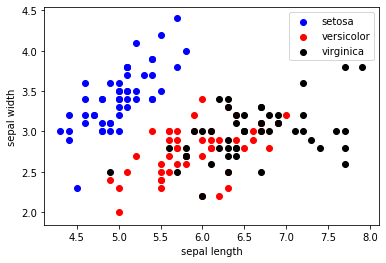

In [150]:
plt.scatter(X[:50,0],X[:50,1],color='blue',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='red',label='versicolor')
plt.scatter(X[100:150,0],X[100:150,1],color='black',label='virginica')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

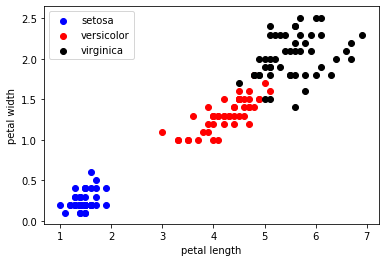

In [151]:
plt.scatter(X[:50,2],X[:50,3],color='blue',label='setosa')
plt.scatter(X[50:100,2],X[50:100,3],color='red',label='versicolor')
plt.scatter(X[100:150,2],X[100:150,3],color='black',label='virginica')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [153]:
scaler = StandardScaler()
scaler.fit(X_train) # fit only the training data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [154]:
k = 3 # 3 NN 
knn = KNeighborsClassifier(n_neighbors=k)

In [155]:
knn.fit(X_train_std, y_train) # train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [156]:
pred = knn.predict(X_test_std) # evaluate on test set
print(accuracy_score(y_test,pred)) # accuracy

0.98


## Cross Validation -  for different k values

Evaluate algorithm's accuracy as we tune the hyperparameter k

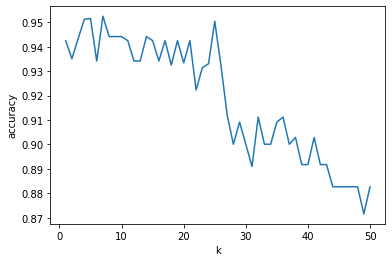

In [157]:
k_scores = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(np.arange(1,51), k_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [158]:
np.argmax(k_scores)

6

The most accurate model is given by (6+1) k=7

In [169]:
max(k_scores)

0.9525252525252526

kNN classifier for the iris data set: 95% accuracy

# k-Nearest Neighbors Regressor (Boston House Prices)

In [159]:
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [160]:
boston = load_boston()

In [161]:
print("Boston data-shape: {0}".format(boston.data.shape)) # 506 examples, 13 features

Boston data-shape: (506, 13)


In [162]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.33, random_state=42)

In [164]:
scaler = StandardScaler()
scaler.fit(X_train) # fit only the training data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [165]:
k = 20
test_score = []
MSE = []
for i in range(1, k+1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_std, y_train) 
    y_pred = knn.predict(X_test_std)
    MSE.append(mean_squared_error(y_pred, y_test)) 
    test_score.append(knn.score(X_test_std, y_test))

Text(0.5, 1.0, 'k-nn Boston Housing Prices')

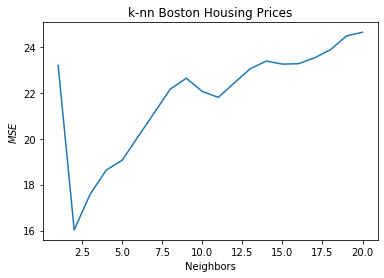

In [166]:
neighbors = range(1, k+1)

pyplot.plot(neighbors, MSE)
pyplot.xlabel("Neighbors")
pyplot.ylabel("$MSE$")
pyplot.title("k-nn Boston Housing Prices")
#pyplot.legend()

In [167]:
np.argmin(MSE)+1

2

The most accurate model is given by k=2 

In [168]:
min(MSE)

16.026497005988023

Boston Housing Prices with kNN regression: ~16 mean square error